In [3]:
import pandas as pd
import numpy as np 

# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)
import seaborn as sns 
import matplotlib.pyplot as plt 

# Modeling
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier



#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report

#feature select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("finproclean.csv") 

In [7]:
df.to_html("dataset.html")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   TotalChargesNum                          7043 non-null   float64
 10  MultipleLines_No                         7043 no

In [22]:
pd.set_option('display.max_columns', None)
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  Churn  TotalChargesNum  \
0                    1           29.85      0            29.85   
1                    0           56.95      0          1889.50   
2                    1           53.85      1           108.15   
3                    0           42.30      0          1840.75   
4                    1           70.70      1           151.65   
...                ...             ...    ...              ...   
7038                 1           84.80      0          1990.50   
7039                 1          103.20      0          7362.90   
7040                 1           29.60      0           346.45   
7041                 1           74.40      1           306.60   
7042                 1          105.65      0          6844.50   

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1                               0                  0   
2                    1                               0                  0   
3                    0                               1                  0   
4                    1                               0                  0   
...                ...                             ...                ...   
7038                 0                               0                  1   
7039                 0                               0                  1   
7040                 0                               1                  0   
7041                 0                               0                  1   
7042                 1                               0                  0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4                       0                            1                   0   
...                   ...                          ...                 ...   
7038                    1                            0                   0   
7039                    0                            1                   0   
7040                    1                            0                   0   
7041                    0                            1                   0   
7042                    0                            1                   0   

      OnlineSecurity_No  OnlineSecurity_No internet service  \
0                     1                                   0   
1                     0                                   0   
2                     0                                   0   
3                     0                                   0   
4                     1                                   0   
...                 ...                                 ...   
7038                 

In [24]:
x= df[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No"]].values
y= df["Churn"].values

In [ ]:
 tenure  16278.923685
7                         MonthlyCharges   3680.787699
25                     Contract_Two year    488.578090
27        PaymentMethod_Electronic check    426.422767
10           InternetService_Fiber optic    374.476216
11                    InternetService_No    286.520193
12    OnlineSecurity_No internet service    286.520193
14      OnlineBackup_No internet service    286.520193
16  DeviceProtection_No internet service    286.520193
18       TechSupport_No internet service  

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [26]:
model = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=5,criterion="entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [27]:
# 10 Folds Cross Validation 
clf_score= cross_val_score(model, x_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.78864353 0.77129338 0.81545741 0.78864353 0.8044164  0.77917981
 0.79810726 0.7807571  0.78830964 0.79778831]


0.7912596369000454

In [28]:
y_pred = model.predict(x_test)

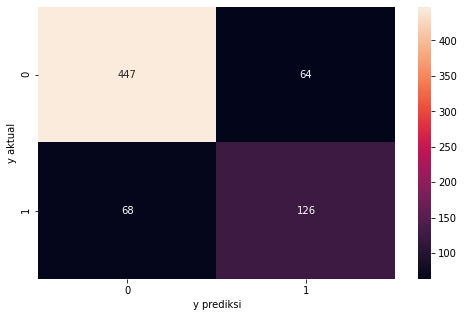

In [29]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [30]:
labels = ['Not Churned', 'Churned']

In [31]:
Best = pd.DataFrame(classification_report(y_test,y_pred, target_names= labels, output_dict=True)).T

In [32]:
Best

precision    recall  f1-score     support
Not Churned    0.867961  0.874755  0.871345  511.000000
Churned        0.663158  0.649485  0.656250  194.000000
accuracy       0.812766  0.812766  0.812766    0.812766
macro avg      0.765560  0.762120  0.763798  705.000000
weighted avg   0.811604  0.812766  0.812156  705.000000

In [40]:
import joblib

In [41]:
joblib.dump(model, "model_final")

['model_final']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   TotalChargesNum                          7043 non-null   float64
 10  MultipleLines_No                         7043 no

In [5]:
df_final = df[["tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineBackup_No internet service","OnlineSecurity_No internet service","TechSupport_No internet service","InternetService_Fiber optic","InternetService_No","Churn"]]

In [6]:
df_final

tenure  MonthlyCharges  Contract_Month-to-month  Contract_Two year  \
0          1           29.85                        1                  0   
1         34           56.95                        0                  0   
2          2           53.85                        1                  0   
3         45           42.30                        0                  0   
4          2           70.70                        1                  0   
...      ...             ...                      ...                ...   
7038      24           84.80                        0                  0   
7039      72          103.20                        0                  0   
7040      11           29.60                        1                  0   
7041       4           74.40                        1                  0   
7042      66          105.65                        0                  1   

      PaymentMethod_Electronic check  OnlineBackup_No internet service  \
0                                  1                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  1                                 0   
...                              ...                               ...   
7038                               0                                 0   
7039                               0                                 0   
7040                               1                                 0   
7041                               0                                 0   
7042                               0                                 0   

      OnlineSecurity_No internet service  TechSupport_No internet service  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   
...                                  ...                              ...   
7038                                   0                                0   
7039                                   0                                0   
7040                                   0                                0   
7041                                   0                                0   
7042                                   0                                0   

      InternetService_Fiber optic  InternetService_No  Churn  
0                               0                   0      0  
1                               0                   0      0  
2                               0                   0      1  
3                               0                   0      0  
4                               1                   0      1  
...                           ...                 ...    ...  
7038                            0                   0      0  
7039                            1                   0      0  
7040                            0                   0      0  
7041                            1                   0      1  
7042                            1                   0      0  

[7043 rows x 11 columns]